In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
s1 = "The postman delivered the package to the wrong address."
s2 = "I wrapped a beautiful present for my friend's birthday."
s3="The delivery truck arrived late due to heavy traffic."
s4="We need to check the shipping address before sending the order."
s5="Online shopping offers a wide variety of products with fast delivery."
tfidf = TfidfVectorizer(ngram_range=(1,1))

new_data = tfidf.fit_transform((s1,s2,s3,s4,s5))
df = pd.DataFrame(index=[1,2,3,4,5], columns=tfidf.get_feature_names_out(), data=new_data.toarray())
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
1,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
2,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
3,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


[[  49  471 4426 ...    0    0    0]
 [  46  336 1499 ...    0    0    0]
 [  47  489    8 ...    0    0    0]
 ...
 [9002   60    8 ...    0    0    0]
 [   5  533  114 ...    0    0    0]
 [2683   61  465 ...    0    0    0]]
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Accuracy Score:  0.9072966507177034

Classification Report: 
               precision    recall  f1-score   support

         ham       0.95      0.94      0.95      1448
        spam       0.64      0.71      0.67       224

    accuracy                           0.91      1672
   macro avg       0.80      0.82      0.81      1672
weighted avg       0.91      0.91      0.91      1672



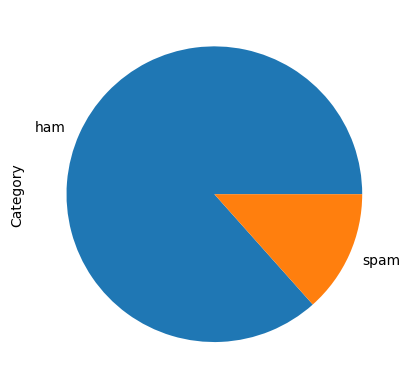

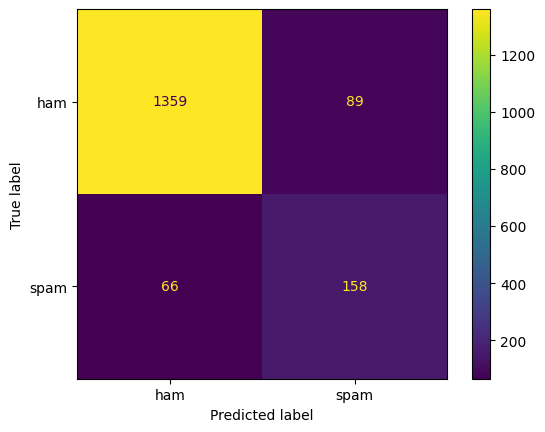

In [12]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('spam_messages.csv')
X=df['Message']
y=df['Category']
y.value_counts().plot(kind='pie')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
seq = tokenizer.texts_to_sequences(X)
X = pad_sequences(seq, maxlen=1000, padding='post')
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24, stratify = y)
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(y_pred)


print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



In [13]:
y_new=pd.read_csv('sample.csv')

tokenizer.fit_on_texts(y_new)
seq = tokenizer.texts_to_sequences(y_new)
y_new = pad_sequences(seq, maxlen=1000, padding='post')
y_pred = dt.predict(y_new)
y_pred

array(['ham', 'ham', 'ham'], dtype=object)